In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [7]:
data = 'Crop_Recommendation.csv'
df = pd.read_csv(data)

In [8]:
df.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice


In [9]:
le = LabelEncoder()
df['Crop'] = le.fit_transform(df['Crop'])
crop_names = le.classes_

In [10]:
x = df.drop('Crop', axis = 1)
y = df['Crop']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [11]:
model = RandomForestClassifier(n_estimators = 200, random_state = 42)
model.fit(x_train,  y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [12]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")
print("Classifiacation Report:\n", classification_report(y_test, y_pred))

Accuracy: 99.32%
Classifiacation Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.92      1.00      0.96        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      0.96      0.98        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      

In [13]:
plt.figure(figsize=(14, 6))
bar_width = 0.35
index = range(len(crop_names))

<Figure size 1400x600 with 0 Axes>

In [14]:
cm = confusion_matrix(y_test, y_pred)
correct_preds = np.diag(cm)
total_preds = np.sum(cm, axis=1)
incorrect_preds = total_preds - correct_preds

In [15]:
index = np.arange(len(crop_names))
bar_width = 0.35

<BarContainer object of 22 artists>

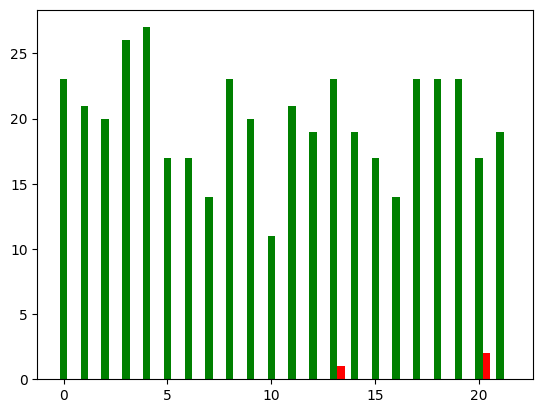

In [16]:
plt.bar(index, correct_preds, bar_width, label='Correct Predictions', color='green')
plt.bar(index + bar_width, incorrect_preds, bar_width, label='Incorrect Predictions', color='red')

In [17]:
# Get user input
print("Enter the values for the following soil and weather parameters:")

N = int(input("Nitrogen (N): "))
P = int(input("Phosphorus (P): "))
K = int(input("Potassium (K): "))
temperature = float(input("Temperature (°C): "))
humidity = float(input("Humidity (%): "))
ph = float(input("pH value: "))
rainfall = float(input("Rainfall (mm): "))

# Create DataFrame from input
sample = pd.DataFrame([[N, P, K, temperature, humidity, ph, rainfall]],
                    columns=['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity', 'pH_Value', 'Rainfall'])

# Predict crop
predicted_class = model.predict(sample)
predicted_crop = le.inverse_transform(predicted_class)
print(f"\n🌾 Recommended Crop to Plant: {predicted_crop[0]}")


Enter the values for the following soil and weather parameters:

🌾 Recommended Crop to Plant: Papaya
